# 프로젝트 목표
- 대출 승인 금액 (Loan Sanction Amount) 예측하기

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'data/loan.csv'
df = pd.read_csv(url)
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,3.0,809.44,0,NaN,746,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,1.0,780.40,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,1.0,833.15,0,Unpossessed,546,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,NaN,745.55,1,Active,715,4,Semi-Urban,1,208567.91,74008.28


- 열이 너무 많아서 중간 열들이 생략되므로 모두 표현되도록 설정

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,4,Semi-Urban,1,208567.91,74008.28


## 데이터 살펴보기

### 간단한 분석

In [ ]:
df.columns

- Customer ID: 고객고유번호
- Name: 고객이름
- Gender: 성별
- Age: 나이
- Income (USD): 수입
- Income Stability: 수입 안정성
- Profession: 직업 상태
- Type of Employment: 고용 형태
- Location: 거주 지역
- Loan Amount Request (USD): 대출 신청 금액
- Current Loan Expenses (USD): 기존 대출 비용
- Expense Type 1, Expense Type 2: 기존 대출 유형
- Dependents: 부양 가족 수
- Credit Score: 신용점수
- No. of Defaults: 파산이력
- Has Active Credit Card: 가용 신용카드 보유여부
- Property ID: 부동산고유번호
- Property Type: 부동산 유형
- Property Location: 부동산 지역
- Co-Applicant: 공동 신청 여부
- Property Price: 부동산 가격
- Loan Sanction Amount (USD): 대출 승인 금액

In [ ]:
df.head()

- Customer ID, Name, Property ID 등 예측에 쓸모없는 특성들이 있다...
- 예측해야하는 타겟 변수 Loan Sanction Amount (USD)가 마지막 열에 있다...
- No. of Defaults 는 파산 경험 여부(0과 1)일까? 파산 경험 횟수(자연수)일까?
- Expense Type 1, Expense Type 2, Property Type 의 값이 정확히 의미하는 것을 알지는 못하겠다...
- Profession 과 Type of Employment 은 어느정도 연관성이 있을 것 같다...

### 요약 통계 분석

In [4]:
df.describe() #요약통계

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,4.000000,1.000000,1.077967e+06,481907.320000


- 나이는 18살부터 65살까지 분포되어 있군...
- 수입이 엄청 많은 사람도 있군...
- 부양 가족 수가 엄청 많은 사람도 있군...
- No. of Defaults 는 단순히 파산 경험 여부(0과 1)인 것 같군...
- Property ID 는 숫자 데이터기는 하지만 통계적 의미는 없겠군...
- Property Type 는 총 4개의 유형이 있군...
- 최솟값이 -999인 이상한 값이 여러 특성들에 들어있군...
- 타겟 특성에도 -999가 있으며, 0도 있다... 어떻게 다뤄야 할까?

### 타겟 특성 시각화 분석

In [ ]:
sns.displot((df['Loan Sanction Amount (USD)'])) #아마 -999또는 0원 (대출이 거절된 경우) 가 많이 포진된 듯?

- 엄청 많은 대출 금액이 승인된 사례도 있나보군...
- 0 쪽에 엄청 많은 수의 데이터가 포진해 있군...

### 대출 신청 금액 특성 시각화 분석

In [ ]:
sns.displot((df['Loan Amount Request (USD)'])) #0원 신청은 당연히 없음

- 터무니 없게 신청한 데이터는 확인되지 않는군...

### 부동산 가격 vs 대출 승인 금액 시각화

In [ ]:
sns.scatterplot(x=df['Property Price'], y=df['Loan Sanction Amount (USD)'])

- 대체로 비싼 부동산일수록 대출승인금액이 많군...
- 아래에 깔려있는 데이터들은 아마 대출이 거절된 케이스겠지?
- 왼쪽에 깔려있는 데이터들은 아마 결측치겠지? (부동산이 0원일리는 없으니...)

### 대출 신청 금액 vs 대출 승인 금액 시각화

In [ ]:
sns.scatterplot(x=df['Loan Amount Request (USD)'], y=df['Loan Sanction Amount (USD)'])

- 역시 양의 상관관계를 보이는군
- 전반적으로 강한 직선의 형태가 보인다. 직선의 기울기를 정하는 결정적인 요소가 있지 않을까?

## 데이터 분리

### 훈련 데이터와 테스트 데이터로 나누기

In [ ]:
 #테스트 데이터가 훈련 데이터에 섞여 들어 있다면 공정한 학습이 아니다
 #수능 문제를 미리 알고 공부하는 것과 동일 ...
# 훈련 데이터로만 학습 후에 테스트 데이터로만 테스트

In [5]:
# 라이브러리 설치
import sys
!{sys.executable} -m pip install scikit-learn
from sklearn.model_selection import train_test_split

In [6]:
# 80%를 훈련 데이터로 사용
train, test = train_test_split(df, test_size=0.2, random_state=42) #테스트 데이터틑 20%로, 훈련 데이터는 80%로 쪼개기
train

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
21753,C-15808,Minerva Dundon,M,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,NaN,0,Active,540,4,Semi-Urban,1,526542.91,235683.91
251,C-29367,Darius Granado,M,36,NaN,Low,Working,NaN,Semi-Urban,132263.08,500.43,N,N,1.0,646.05,1,NaN,320,3,Urban,1,250293.24,0.00
22941,C-20386,Verlene Hagar,M,52,NaN,Low,Commercial associate,Sales staff,Semi-Urban,112307.54,539.09,N,Y,1.0,706.42,0,Active,6,2,Rural,1,157866.23,72999.90
618,C-14237,Yang Leitner,F,18,NaN,Low,Working,Laborers,Rural,24268.35,168.21,N,N,2.0,640.23,0,Unpossessed,869,2,Urban,1,30470.51,0.00
17090,C-14759,Ilda Jeffords,F,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,21,3,Urban,1,142224.12,57256.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,C-5582,Sallie Crinklaw,F,19,NaN,Low,Working,Managers,Rural,122864.44,355.29,N,Y,1.0,793.91,1,NaN,938,2,Rural,1,196585.54,86005.11
5390,C-10960,Franklin Neisler,M,28,1374.35,Low,Working,NaN,Rural,101151.00,373.80,Y,Y,5.0,662.72,0,Inactive,355,1,Semi-Urban,1,189233.51,65748.15
860,C-16117,Danette Bittinger,M,18,1489.23,NaN,Working,NaN,Semi-Urban,91833.60,329.90,N,Y,2.0,794.00,0,Unpossessed,646,4,Semi-Urban,1,109661.71,64283.52
15795,C-25040,Su Augusta,F,36,NaN,Low,Working,Laborers,Semi-Urban,62065.25,404.37,N,Y,3.0,726.07,0,Unpossessed,988,4,Rural,1,71660.28,43445.68


- 이제 훈련 데이터에 Feature engineering을 적용할 준비가 되었다.
- 테스트 데이터는 이 과정에 조금도 활용되어서는 안된다.

## 데이터 전처리

### 불필요한 특성 제거

In [7]:
train.drop(['Customer ID', 'Name', 'Property ID'], axis=1, inplace=True)
train

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
21753,M,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,NaN,0,Active,4,Semi-Urban,1,526542.91,235683.91
251,M,36,NaN,Low,Working,NaN,Semi-Urban,132263.08,500.43,N,N,1.0,646.05,1,NaN,3,Urban,1,250293.24,0.00
22941,M,52,NaN,Low,Commercial associate,Sales staff,Semi-Urban,112307.54,539.09,N,Y,1.0,706.42,0,Active,2,Rural,1,157866.23,72999.90
618,F,18,NaN,Low,Working,Laborers,Rural,24268.35,168.21,N,N,2.0,640.23,0,Unpossessed,2,Urban,1,30470.51,0.00
17090,F,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1,142224.12,57256.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,F,19,NaN,Low,Working,Managers,Rural,122864.44,355.29,N,Y,1.0,793.91,1,NaN,2,Rural,1,196585.54,86005.11
5390,M,28,1374.35,Low,Working,NaN,Rural,101151.00,373.80,Y,Y,5.0,662.72,0,Inactive,1,Semi-Urban,1,189233.51,65748.15
860,M,18,1489.23,NaN,Working,NaN,Semi-Urban,91833.60,329.90,N,Y,2.0,794.00,0,Unpossessed,4,Semi-Urban,1,109661.71,64283.52
15795,F,36,NaN,Low,Working,Laborers,Semi-Urban,62065.25,404.37,N,Y,3.0,726.07,0,Unpossessed,4,Rural,1,71660.28,43445.68


### 이상 데이터 처리

- -999 를 결측치로 변환

In [8]:
train = train.replace(-999, np.NaN)
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,24000.000000,20352.000000,24000.000000,23732.000000,21983.000000,22623.000000,24000.000000,24000.000000,23867.000000,2.371000e+04,23463.000000
mean,40.058417,2567.533530,89075.615086,409.670631,2.250512,739.726632,0.193875,2.463708,0.854527,1.336452e+05,48224.182099
std,16.029209,1775.075442,59637.687461,217.300939,0.947379,72.271823,0.395340,1.121005,0.352584,9.296589e+04,48215.949928
min,18.000000,378.760000,6048.240000,33.760000,1.000000,580.000000,0.000000,1.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1652.707500,41272.637500,251.630000,2.000000,681.225000,0.000000,1.000000,1.000000,6.226356e+04,0.000000
50%,40.000000,2229.965000,75326.655000,376.550000,2.000000,739.880000,0.000000,2.000000,1.000000,1.115531e+05,36155.430000
75%,55.000000,3092.775000,120378.247500,522.445000,3.000000,799.090000,0.000000,3.000000,1.000000,1.805265e+05,74766.920000
max,65.000000,122966.280000,621497.820000,3419.660000,10.000000,896.260000,1.000000,4.000000,1.000000,1.077967e+06,395368.740000


- 이상 데이터는 사라졌지만 결측치가 늘어났을 것이다.
- 결측치 비율 확인

In [ ]:
train.isna().mean()

- 성별 데이터에 결측치가 좀 보인다.
- 성별 데이터는 얼마나 중요할까?
- 성별에 따른 대출 승인 금액 차이 확인

In [ ]:
sns.boxplot(data=train, x='Gender', y='Loan Sanction Amount (USD)')

- 성별과 무관한 것 같다.
- 그냥 성별 특성을 삭제하자.

In [9]:
train.drop(('Gender'), axis=1, inplace=True)

- 수입도 결측치 비율이 높다.
- 하지만 수입은 아주 중요한 요소라 특성 자체를 삭제하면 안될듯 하다.
- 수입이 결측치인 데이터만 삭제하자.

In [10]:
train = train.dropna(subset=['Income (USD)']) #dropna - 결측치만 삭제

- Type of Employment 도 결측치 비율이 높다.
- 대체 어떤 고용 형태들이 있을까?

In [ ]:
train['Type of Employment'].value_counts()

- 이 특성은 Profession 특성과 관련이 있을 것 같다.

In [ ]:
train['Profession'].value_counts()

- Type of Employment 가 NaN 인 데이터에서 Profession 은 어떻게 다를까?

In [ ]:
cond = train['Type of Employment'].isna()
train[cond]['Profession'].value_counts()

- Pensioner 의 수가 변함이 없다!
- 즉, 연금 수급자는 고용 형태가 무조건 결측치로 되어 있다.
- 더 정확히 검증해보자.

In [ ]:
cond = train['Profession'] == 'Pensioner'
train[cond]['Type of Employment'].unique()

- 다른 직업들은 모종의 이유로 결측치가 조금씩 있는 것 같다.
- 즉, 같은 결측치더라도 의미에 차이가 있을 수 있다.

- Profession 이 Pensioner 인 데이터들은 Type of Employment 을 Pensioner 로 설정
- 연금수급자들의 고용 형태가 결측치에서 Pensioner로 바뀔 것이다.

In [11]:
train['Type of Employment'] = train.apply(lambda x: 'Pensioner' if x['Profession']=='Pensioner' else x['Type of Employment'], axis=1)
train.head(15)

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,NaN,0,Active,4,Semi-Urban,1.0,526542.91,235683.91
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50
21403,57,2269.25,Low,Commercial associate,NaN,Semi-Urban,157599.35,591.36,Y,Y,2.0,843.75,1,Unpossessed,1,Urban,1.0,247015.77,118199.51
8765,61,1981.09,Low,Commercial associate,Sales staff,Semi-Urban,55321.21,275.62,Y,N,2.0,NaN,0,Active,4,Urban,1.0,69411.11,38724.85
19011,29,2192.57,Low,Working,NaN,Semi-Urban,52186.62,253.24,N,Y,4.0,796.08,0,Inactive,1,Urban,1.0,90177.78,41749.30
29152,38,4797.56,Low,Working,Laborers,Urban,175997.32,578.36,N,Y,1.0,822.29,0,Unpossessed,2,Semi-Urban,1.0,208321.21,123198.12
8270,54,4246.35,Low,Commercial associate,High skill tech staff,Semi-Urban,107614.61,902.19,N,Y,3.0,835.02,0,Active,1,Rural,0.0,171597.77,0.00


- 나머지 결측치들은 Unknown 로 설정

In [12]:
train['Type of Employment'] = train['Type of Employment'].fillna('Unknown')
train.head(15)

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,NaN,0,Active,4,Semi-Urban,1.0,526542.91,235683.91
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50
21403,57,2269.25,Low,Commercial associate,Unknown,Semi-Urban,157599.35,591.36,Y,Y,2.0,843.75,1,Unpossessed,1,Urban,1.0,247015.77,118199.51
8765,61,1981.09,Low,Commercial associate,Sales staff,Semi-Urban,55321.21,275.62,Y,N,2.0,NaN,0,Active,4,Urban,1.0,69411.11,38724.85
19011,29,2192.57,Low,Working,Unknown,Semi-Urban,52186.62,253.24,N,Y,4.0,796.08,0,Inactive,1,Urban,1.0,90177.78,41749.30
29152,38,4797.56,Low,Working,Laborers,Urban,175997.32,578.36,N,Y,1.0,822.29,0,Unpossessed,2,Semi-Urban,1.0,208321.21,123198.12
8270,54,4246.35,Low,Commercial associate,High skill tech staff,Semi-Urban,107614.61,902.19,N,Y,3.0,835.02,0,Active,1,Rural,0.0,171597.77,0.00


In [ ]:
train.isna().mean()

- Income Stability 도 결측치 비율이 높다.

In [ ]:
train['Income Stability'].value_counts()

- High 비율이 좀 적네? 어떤 사람들이 High 일까?

In [ ]:
cond = train['Income Stability'] == 'High'
train[cond]

- 연금수급자들만 나오네? 더 확인해보자.

In [ ]:
cond = train['Income Stability'] == 'High'
train[cond]['Type of Employment'].value_counts()

- 데이터 하나만 빼고 모든 High 는 연금수급자들이다.
- 고용형태가 연금수급자이면 무조건 High 로 설정하자.

In [13]:
train['Income Stability'] = train['Type of Employment'].apply(lambda x: 'High' if x == 'Pensioner' else 'Low')

- 잘 되었는지 확인해보자.

In [ ]:
train.groupby(['Profession', 'Income Stability']).count()

- 자 이제 다시 결측치 현황을 보자.

In [14]:
train.isna().mean()

Age                            0.000000
Income (USD)                   0.000000
Income Stability               0.000000
Profession                     0.000000
Type of Employment             0.000000
Location                       0.000000
Loan Amount Request (USD)      0.000000
Current Loan Expenses (USD)    0.009680
Expense Type 1                 0.000000
Expense Type 2                 0.000000
Dependents                     0.073457
Credit Score                   0.050658
No. of Defaults                0.000000
Has Active Credit Card         0.051739
Property Type                  0.000000
Property Location              0.010613
Co-Applicant                   0.004914
Property Price                 0.010859
Loan Sanction Amount (USD)     0.020440
dtype: float64

- 많이 정리된 모습이다.
- 다른 특성들도 정리를 해야하는데, 결측치를 median 값으로 대체하는 방법을 쓰도록 한다.

In [15]:
median_value = train['Current Loan Expenses (USD)'].median()
train['Current Loan Expenses (USD)'] = train['Current Loan Expenses (USD)'].fillna(median_value) #중간값으로 채움

In [16]:
median_value = train['Dependents'].median()
train['Dependents'] = train['Dependents'].fillna(median_value)

In [17]:
median_value = train['Credit Score'].median()
train['Credit Score'] = train['Credit Score'].fillna(median_value)

In [ ]:
median_value = train['Property Price'].median()
train['Property Price'] = train['Property Price'].fillna(median_value)
#코드 실행 하지말기!

In [18]:
train.isna().mean()

Age                            0.000000
Income (USD)                   0.000000
Income Stability               0.000000
Profession                     0.000000
Type of Employment             0.000000
Location                       0.000000
Loan Amount Request (USD)      0.000000
Current Loan Expenses (USD)    0.000000
Expense Type 1                 0.000000
Expense Type 2                 0.000000
Dependents                     0.000000
Credit Score                   0.000000
No. of Defaults                0.000000
Has Active Credit Card         0.051739
Property Type                  0.000000
Property Location              0.010613
Co-Applicant                   0.004914
Property Price                 0.010859
Loan Sanction Amount (USD)     0.020440
dtype: float64

- Has Active Credit Card 를 정리해보자.

In [ ]:
train['Has Active Credit Card'].value_counts()

- 분포가 고르다.
- 처리가 애매하므로 결측치를 Unknown 으로 설정하자.

In [19]:
train['Has Active Credit Card'] = train['Has Active Credit Card'].fillna('Unknown')
train['Has Active Credit Card'].value_counts()

Has Active Credit Card
Active         6640
Inactive       6454
Unpossessed    6205
Unknown        1053
Name: count, dtype: int64

- Property Location 를 정리해보자.

In [ ]:
train['Property Location'].value_counts()

- 마찬가지로 Unknown 으로 설정해야겠다.

In [20]:
train['Property Location'] = train['Property Location'].fillna('Unknown')
train['Property Location'].value_counts()

Property Location
Semi-Urban    7037
Rural         6845
Urban         6254
Unknown        216
Name: count, dtype: int64

- Co-Applicant 를 정리해보자.

In [ ]:
train['Co-Applicant'].value_counts()

- 대부분이 1 이었다면 결측치를 모두 1로 설정해도 별 상관이 없었을텐데, 약간 애매하다.
- 비율이 많지 않으니 그냥 결측치인 데이터를 삭제하자.
- 타겟 특성인 Loan Sanction Amount (USD) 결측치인 데이터는 삭제하는 것이 좋겠다.
- 예측해야 하는 정답 자체가 결측인 데이터는 쓸모가 없기 때문이다.

In [22]:
train = train.dropna()
train

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,18,3530.34,Low,Working,Accountants,Rural,75062.51,350.56,N,Y,3.0,830.73,0,Unpossessed,1,Urban,1.0,140138.75,56296.88
21575,42,1971.97,Low,Working,Unknown,Semi-Urban,74362.77,596.80,N,Y,3.0,600.76,1,Unpossessed,2,Rural,1.0,137728.40,0.00
5390,28,1374.35,Low,Working,Unknown,Rural,101151.00,373.80,Y,Y,5.0,662.72,0,Inactive,1,Semi-Urban,1.0,189233.51,65748.15
860,18,1489.23,Low,Working,Unknown,Semi-Urban,91833.60,329.90,N,Y,2.0,794.00,0,Unpossessed,4,Semi-Urban,1.0,109661.71,64283.52


- 데이터가 약 2만건으로 줄었다.

In [23]:
train.isna().mean()

Age                            0.0
Income (USD)                   0.0
Income Stability               0.0
Profession                     0.0
Type of Employment             0.0
Location                       0.0
Loan Amount Request (USD)      0.0
Current Loan Expenses (USD)    0.0
Expense Type 1                 0.0
Expense Type 2                 0.0
Dependents                     0.0
Credit Score                   0.0
No. of Defaults                0.0
Has Active Credit Card         0.0
Property Type                  0.0
Property Location              0.0
Co-Applicant                   0.0
Property Price                 0.0
Loan Sanction Amount (USD)     0.0
dtype: float64

- 결측치가 모두 정리되었다.

### 전처리 값 보관

- 이상 데이터를 처리하는 과정에서 median 값을 활용해 결측치를 채워넣는 부분이 있었다.
- 나중에 테스트 데이터에 있는 결측치도 이 median 값으로 채워넣어야 한다. 
- 따라서 이 median 값을 보관해놓고 있어야 한다.

In [24]:
info_dict = {'Current Loan Expenses (USD)': train['Current Loan Expenses (USD)'].median(),
             'Credit Score': train['Credit Score'].median(),
             'Dependents': train['Dependents'].median()}
info_dict

{'Current Loan Expenses (USD)': 375.83,
 'Credit Score': 739.71,
 'Dependents': 2.0}

## 피쳐 엔지니어링

### 아이디어 1
- 수입과 대출신청금액을 생각해보자.
- 수입이 적은데 대출을 무리하게 신청한다면? 승인이 거절되거나 승인금액이 적을 것이다.
- 수입이 많다면 승인금액이 충분하게 나올 것이다.

In [25]:
# 수입 대비 대출신청금액 비율을 계산하여 특성 추가
train['Loan/Income'] = train['Loan Amount Request (USD)'] / train['Income (USD)']
train

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91,23.761046
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53,34.645494
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00,32.608667
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00,26.584210
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50,28.020902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,18,3530.34,Low,Working,Accountants,Rural,75062.51,350.56,N,Y,3.0,830.73,0,Unpossessed,1,Urban,1.0,140138.75,56296.88,21.262119
21575,42,1971.97,Low,Working,Unknown,Semi-Urban,74362.77,596.80,N,Y,3.0,600.76,1,Unpossessed,2,Rural,1.0,137728.40,0.00,37.709889
5390,28,1374.35,Low,Working,Unknown,Rural,101151.00,373.80,Y,Y,5.0,662.72,0,Inactive,1,Semi-Urban,1.0,189233.51,65748.15,73.599156
860,18,1489.23,Low,Working,Unknown,Semi-Urban,91833.60,329.90,N,Y,2.0,794.00,0,Unpossessed,4,Semi-Urban,1.0,109661.71,64283.52,61.665156


### 아이디어 2
- 마찬가지로 부동산 가격과 대출신청금액의 비율도 대출승인에 중요한 요소일 것이다.

In [26]:
# 부동산 가격 대비 대출신청금액 비율을 계산하여 특성 추가
train['Loan/Price'] = train['Loan Amount Request (USD)'] / train['Property Price']
train

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91,23.761046,0.559508
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53,34.645494,0.536773
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00,32.608667,0.651632
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00,26.584210,0.690518
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50,28.020902,0.552542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,18,3530.34,Low,Working,Accountants,Rural,75062.51,350.56,N,Y,3.0,830.73,0,Unpossessed,1,Urban,1.0,140138.75,56296.88,21.262119,0.535630
21575,42,1971.97,Low,Working,Unknown,Semi-Urban,74362.77,596.80,N,Y,3.0,600.76,1,Unpossessed,2,Rural,1.0,137728.40,0.00,37.709889,0.539923
5390,28,1374.35,Low,Working,Unknown,Rural,101151.00,373.80,Y,Y,5.0,662.72,0,Inactive,1,Semi-Urban,1.0,189233.51,65748.15,73.599156,0.534530
860,18,1489.23,Low,Working,Unknown,Semi-Urban,91833.60,329.90,N,Y,2.0,794.00,0,Unpossessed,4,Semi-Urban,1.0,109661.71,64283.52,61.665156,0.837426


### 결과 확인

In [27]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price
count,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,1.963500e+04,19635.000000,19635.000000,19635.000000
mean,40.059893,2567.140884,88825.040053,408.461140,2.234428,739.737473,0.191648,2.462847,0.839470,1.332174e+05,46284.227334,38.550683,0.683125
std,16.049166,1787.552424,59364.401289,215.714545,0.918330,70.505678,0.393607,1.121381,0.367106,9.260160e+04,48050.778570,25.765819,0.108532
min,18.000000,378.760000,6048.240000,34.040000,1.000000,583.050000,0.000000,1.000000,0.000000,7.265950e+03,0.000000,0.801778,0.526325
25%,25.000000,1652.485000,41418.190000,253.780000,2.000000,684.075000,0.000000,1.000000,1.000000,6.234424e+04,0.000000,20.249341,0.587106
50%,40.000000,2230.380000,75189.220000,375.830000,2.000000,739.710000,0.000000,2.000000,1.000000,1.112780e+05,33549.450000,31.834734,0.666661
75%,55.000000,3092.020000,119725.530000,517.940000,3.000000,795.380000,0.000000,3.000000,1.000000,1.793109e+05,72698.975000,50.505728,0.768879
max,65.000000,122966.280000,621497.820000,3419.660000,10.000000,896.260000,1.000000,4.000000,1.000000,1.077967e+06,395368.740000,323.376763,0.909014


- Loan/Price 가 너무 높은 데이터가 있다.
- 부동산 가격보다 더 많은 대출을 받으려고 한다? 데이터를 확인해보자.

In [ ]:
train.sort_values('Loan/Price', ascending=False)

- Property Price 가 다 똑같다...?
- 아까 결측치 처리할 때 대체했던 median 값이다!
- 너무 단순하게 median 값으로 채워넣는 바람에 말도안되는 데이터가 만들어져버렸다.
- Property Price 가 결측치였던 데이터는 그냥 삭제하는 것이 좋겠다.
- 해당 코드로 돌아가서 다시 진행한다.

## 그 밖의 전처리

In [28]:
train.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,Y,N,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91,23.761046,0.559508
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,N,Y,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53,34.645494,0.536773
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,N,Y,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00,32.608667,0.651632
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,Y,Y,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00,26.584210,0.690518
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,N,Y,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50,28.020902,0.552542


### 더미 변수 변환

- 문자로 구성된 특성을 숫자로 변환한다.

In [29]:
train = train.replace({'N': 0, 'Y': 1})
train.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,1,0,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91,23.761046,0.559508
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,0,1,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53,34.645494,0.536773
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,0,1,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00,32.608667,0.651632
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,1,1,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00,26.584210,0.690518
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,0,1,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50,28.020902,0.552542


- 나머지 문자열 변수들도 학습할 수 있는 더미 변수로 변환한다.

In [30]:
obj_list = []

for i in train.columns:
    if train[i].dtype == 'object':
        obj_list.append(i)

print(obj_list)

['Income Stability', 'Profession', 'Type of Employment', 'Location', 'Has Active Credit Card', 'Property Location']


In [31]:
for i in obj_list:
    print(i, train[i].nunique())

Income Stability 2
Profession 7
Type of Employment 20
Location 3
Has Active Credit Card 4
Property Location 4


In [32]:
train.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price
21753,27,12398.65,Low,Working,Managers,Urban,294604.89,1255.89,1,0,2.0,739.71,0,Active,4,Semi-Urban,1.0,526542.91,235683.91,23.761046,0.559508
17090,18,2203.52,Low,Working,Laborers,Semi-Urban,76342.04,681.95,0,1,2.0,835.55,0,Inactive,3,Urban,1.0,142224.12,57256.53,34.645494,0.536773
6362,18,2908.01,Low,State servant,High skill tech staff,Rural,94826.33,812.06,0,1,2.0,761.20,0,Unpossessed,2,Urban,1.0,145521.29,0.00,32.608667,0.651632
28329,18,2533.56,Low,State servant,Core staff,Semi-Urban,67352.69,332.47,1,1,2.0,719.85,1,Unpossessed,3,Urban,0.0,97539.42,0.00,26.584210,0.690518
22653,19,1984.48,Low,Working,Cooking staff,Semi-Urban,55606.92,266.62,0,1,3.0,653.38,0,Inactive,3,Semi-Urban,1.0,100638.41,36144.50,28.020902,0.552542


In [33]:
train = pd.get_dummies(train, columns = obj_list)
train.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan/Income,Loan/Price,Income Stability_High,Income Stability_Low,Profession_Businessman,Profession_Commercial associate,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,...,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Pensioner,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Unknown,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unknown,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Unknown,Property Location_Urban
21753,27,12398.65,294604.89,1255.89,1,0,2.0,739.71,0,4,1.0,526542.91,235683.91,23.761046,0.559508,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False
17090,18,2203.52,76342.04,681.95,0,1,2.0,835.55,0,3,1.0,142224.12,57256.53,34.645494,0.536773,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
6362,18,2908.01,94826.33,812.06,0,1,2.0,761.20,0,2,1.0,145521.29,0.00,32.608667,0.651632,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
28329,18,2533.56,67352.69,332.47,1,1,2.0,719.85,1,3,0.0,97539.42,0.00,26.584210,0.690518,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
22653,19,1984.48,55606.92,266.62,0,1,3.0,653.38,0,3,1.0,100638.41,36144.50,28.020902,0.552542,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False


### 컬럼 네임 동기화

- 이렇게 만들어진 훈련 데이터로 머신러닝 모델을 훈련하게 되면,
- 테스트 데이터가 들어오면, 지금까지 진행했던 이상치 처리, 결측치 처리, 피쳐 엔지니어링 등의 과정을 똑같이 거쳐야만 머신러닝 모델에 넣을 수 있다.
- 따라서 더미 변수 생성 과정도 똑같이 거쳐야 한다.
- 이 더미 변수 정보도 info_dict에 보관하도록 하자.

In [34]:
info_dict['cols'] = train.columns.drop('Loan Sanction Amount (USD)')
info_dict

{'Current Loan Expenses (USD)': 375.83,
 'Credit Score': 739.71,
 'Dependents': 2.0,
 'cols': Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Expense Type 1', 'Expense Type 2',
        'Dependents', 'Credit Score', 'No. of Defaults', 'Property Type',
        'Co-Applicant', 'Property Price', 'Loan/Income', 'Loan/Price',
        'Income Stability_High', 'Income Stability_Low',
        'Profession_Businessman', 'Profession_Commercial associate',
        'Profession_Pensioner', 'Profession_State servant',
        'Profession_Student', 'Profession_Unemployed', 'Profession_Working',
        'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
        'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
        'Type of Employment_Drivers', 'Type of Employment_HR staff',
        'Type of Employment_High skill tech staff',
        'Type of Employment_IT staff', 'Type of Employment_Laborers',
        'Type of 

- 이런 정보들은 파일로 저장해두는 것이 안전하다.

In [35]:
import pickle

with open('./info_dict.pkl', 'wb') as f:
    pickle.dump(info_dict, f)

## 모델링

### 훈련 데이터를 훈련/검증 데이터로 나누기

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('Loan Sanction Amount (USD)', axis=1), train['Loan Sanction Amount (USD)'], test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15708, 54), (3927, 54), (15708,), (3927,))

### LightGBM 모델

In [39]:
import sys
!{sys.executable} -m pip install lightgbm
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------------------- ------------------- 0.7/1.3 MB 14.2 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.5 MB/s eta 0:00:00


In [40]:
lgb_r = lgbm.LGBMRegressor(random_state=42)

In [41]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 30, 50, 100],
    'num_leaves': [5, 10, 20, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'feature_fraction': [0.8, 0.9, 1],
    'bagging_fraction': [0.5, 0.8, 1]
}

rand_1 = RandomizedSearchCV(lgb_r, params, n_iter=50, cv=5, random_state=42).fit(X_train, y_train) #최고의 세팅값을 찾아서 훈련데이터에 넣어줌
pickle.dump(rand_1, open('./lgb_r.pkl', 'wb'))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1930
[LightGBM] [Info] Number of data points in the train set: 12566, number of used features: 51
[LightGBM] [Info] Start training from score 46158.400672
[LightGBM] [Warning] feature

### 성능 평가

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
pred_train_1 = rand_1.predict(X_train)
pred_val_1 = rand_1.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


In [44]:
rmse_train_1 = mean_squared_error(y_train, pred_train_1, squared=False) #훈련데이터의 정답, 예측값을 넣어주고 성능 계산
rmse_val_1 = mean_squared_error(y_val, pred_val_1, squared=False)

In [45]:
print(rmse_train_1, rmse_val_1) #수치가 낮을수록 좋은 것

21119.681401173766 24723.846684953674


<Axes: xlabel='Loan Sanction Amount (USD)'>

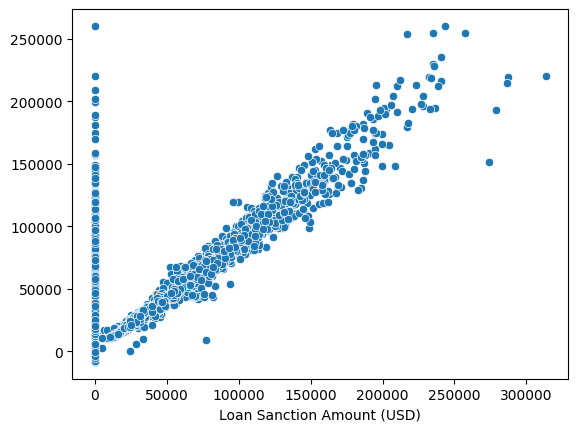

In [46]:
sns.scatterplot(x=y_val, y=pred_val_1)

- 정답값과 예측값이 거의 선형 관계를 이루며 비교적 잘 예측하는 것으로 보인다.
- 하지만 정답값이 0인 데이터(대출이 거절된 케이스)에 대해서 마구잡이로 예측하는 현상이 발생했다.
- 이 문제를 해결하기 위해서는 두 개의 머신러닝 모델을 개발해야 한다.
- 첫 번째 모델로 대출 승인 여부를 예측
- 대출이 거절된 경우는 대출승인금액을 0원으로 예측
- 대출이 승인된 경우에 대해 두 번째 모델로 대출승인금액을 예측
- 이러한 성능 고도화 연구는 머신러닝을 본격적으로 공부하는 사람들의 몫으로 남겨두자...

## 코드 정리

- 현재 실습중인 노트북 환경(.ipynb 파일)은 어디까지나 개발 편의를 위해 사용하는 것이다.
- 실제 머신러닝 모델을 서비스에 탑재, 운용하기 위해서는 파이썬 모듈(.py 파일)로 배포해야 한다.

### 데이터 변환

- 데이터가 주어질 때마다 지금까지 했던 처리 과정을 매끄럽게 수행할 수 있도록 코드를 정리한다.
- data_trans.py 파일로 정리했다.
- 실력 향상을 위해서는 스스로 정리해보는 것을 권장한다.

### 데이터 변환 코드 확인

- 테스트 데이터가 주어졌다고 가정하고, 제대로 전처리가 수행되는지 확인한다.

In [47]:
from data_trans import data_trans

# 테스트 데이터에는 타겟 변수가 있을리 없다!
test = test.drop('Loan Sanction Amount (USD)', axis=1)

test = data_trans(test)
test

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property Type,Co-Applicant,Property Price,Loan/Income,Loan/Price,Income Stability_High,Income Stability_Low,Profession_Businessman,Profession_Commercial associate,Profession_Pensioner,Profession_State servant,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,...,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Pensioner,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Unknown,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unknown,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Unknown,Property Location_Urban,Profession_Student,Profession_Unemployed
2308,48,2631.71,65466.32,519.54,1,1,4.0,646.63,0,3,1.0,72111.03,24.875963,0.907854,False,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,0,0
22404,58,4445.65,88846.60,392.92,1,1,3.0,701.17,0,1,1.0,106418.12,19.985064,0.834882,False,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,0,0
23397,25,1586.37,142786.48,479.47,0,1,2.0,673.92,1,4,1.0,181177.47,90.008308,0.788103,False,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,0,0
2664,36,1591.72,48373.34,241.16,0,1,3.0,728.09,0,4,1.0,74100.66,30.390609,0.652806,False,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,0,0
8511,24,1396.07,41818.82,283.86,0,0,1.0,605.84,0,1,1.0,76436.20,29.954673,0.547108,False,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29920,53,3914.93,58387.24,278.17,1,1,1.0,705.02,0,1,1.0,76209.40,14.913993,0.766142,False,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,0,0
2210,50,1683.33,13908.71,130.10,0,1,1.0,723.67,0,4,1.0,23990.67,8.262616,0.579755,False,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,0,0
14144,55,2120.96,41288.05,358.92,1,1,6.0,622.11,1,2,1.0,47471.34,19.466680,0.869747,False,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,0,0
23108,18,3138.78,77018.51,382.14,0,0,2.0,806.11,0,1,1.0,84900.98,24.537722,0.907157,False,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,Fal

### 예측

- 마찬가지로 학습된 모델을 이용해서 예측을 수행하는 코드를 predict_function.py 에 구현했다.

### 예측코드 확인

In [48]:
from predict_function import predict_func

result = predict_func(test)
result

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


2308       1738.385979
22404     51178.827728
23397     84187.303286
2664      28756.278357
8511        830.046929
             ...      
29920     33432.348115
2210      10481.168198
14144       964.687482
23108     47765.194845
29171    140551.733208
Name: reg, Length: 5004, dtype: float64

## 서비스 탑재

In [49]:
import sys
!{sys.executable} -m pip install fastapi uvicorn

     ---------------------------------------- 0.0/108.5 kB ? eta -:--:--
     ------------------------------------- -- 102.4/108.5 kB ? eta -:--:--
     -------------------------------------- 108.5/108.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/50.9 kB ? eta -:--:--
     ---------------------------------------- 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/92.0 kB ? eta -:--:--
   ----------------------------------- ---- 81.9/92.0 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 92.0/92.0 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.4 kB ? eta -:--:--
   ---------------------------------------- 62.4/62.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
   -------------------------

In [50]:
from fastapi import FastAPI
import uvicorn

import pandas as pd
import numpy as np

from data_trans import data_trans
from predict_function import predict_func

import json
import pickle
import lightgbm

from typing import Union, Any, AnyStr, List, Dict

In [51]:
JSONObject = Dict[AnyStr, Any]
JSONArray = List[Any]
JSONStructure = Union[JSONArray, JSONObject]

In [52]:
app = FastAPI()

@app.post('/predict')
def predict(item: JSONStructure = None):
    item = json.dumps(item)
    df = pd.DataFrame(json.loads(item))

    df = data_trans(df)
    pred = predict_func(df)

    result = {'pred': pred}

    return result

In [53]:
# 서버를 구동시킨 뒤 loan_test.ipynb 파일로 가시오!

if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [31964]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:64567 - "POST /predict HTTP/1.1" 200 OK
